In [18]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import numpy as np

In [19]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [21]:
def gb_predict(X, trees_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
    # прибавляются с шагом eta
    
#     predictions = np.zeros(X.shape[0])
#     for i, x in enumerate(X):
#         prediction = 0
#         for alg in trees_list:
#             prediction += eta * alg.predict([x])[0]
#         predictions[i] = prediction
        
    predictions = np.array(
        [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
    )

    return predictions

In [22]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [23]:
def residual(y, z):
    return - (z - y)

In [24]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [10]:
# Число деревьев в ансамбле
#n_trees = 10

# Максимальная глубина деревьев
#max_depth = 3

# Шаг
#eta = 1

#trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [25]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, eta):
    train_prediction = gb_predict(X_train, trees, eta)

    #print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    #с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, eta)

    #print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    #с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')
    return mean_squared_error(y_test, test_prediction), mean_squared_error(y_train, train_prediction)

In [12]:
#evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 1064.9060046428197
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 1 на тестовой выборке: 4869.561647476561


In [13]:
#def get_error_plot(n_trees, train_err, test_err):
    #plt.xlabel('Iteration number')
    #plt.ylabel('MSE')
    #plt.xlim(0, n_trees)
    #plt.plot(list(range(n_trees)), train_err, label='train error')
    #plt.plot(list(range(n_trees)), test_err, label='test error')
    #plt.legend(loc='upper right')
    #plt.show()

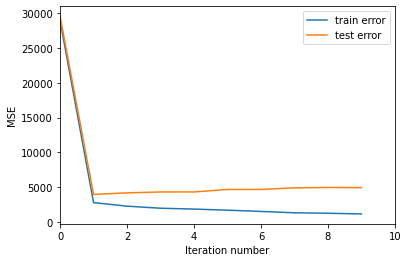

In [14]:
#get_error_plot(n_trees, train_errors, test_errors)

In [15]:
#%%time
#n_trees = 50

#trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

Wall time: 2min 10s


In [16]:
#evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 49.31253181740032
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6289.913746583755


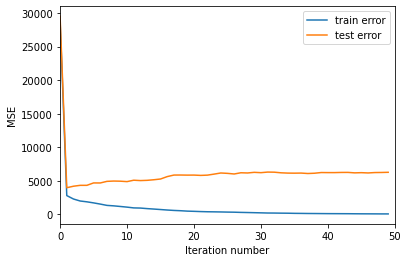

In [17]:
#get_error_plot(n_trees, train_errors, test_errors)

In [ ]:
#%%time
#eta = 0.1

#trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [ ]:
#evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
#get_error_plot(n_trees, train_errors, test_errors)

In [ ]:
#%%time
#eta = 0.01

#trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [ ]:
#evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
#get_error_plot(n_trees, train_errors, test_errors)

In [ ]:
#%%time
#eta = 0.1
#max_depth = 5

#trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, eta)

In [ ]:
#evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
#get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 23984.747923148858
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 4008.251986788565
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1187.5719277781127
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 595.3113353784145
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 385.6163967944114
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 289.2138921362595
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 222.12091237035366
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 163.63396676482833
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 130.2428864123759
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на трениро

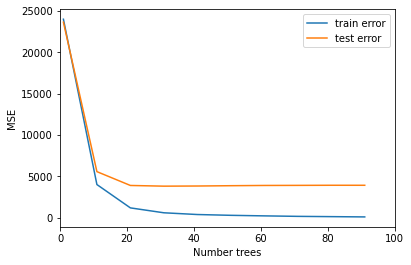

In [28]:
# Для зависимости ошибки от количества деревьев

n=[] #количество деревьев
z_test=[] #ошибка на тестовой выборке
z_train=[] #ошибка на тренировочной выборке

eta = 0.1
max_depth = 5
for i in range(1, 100, 10):
    n.append(i)
    trees, train_errors, test_errors = gb_fit(i, max_depth, X_train, X_test, y_train, y_test, eta)
    test_z, train_z=evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
    z_test.append(test_z)
    z_train.append(train_z)
    
    
plt.xlabel('Number trees')
plt.ylabel('MSE')
plt.xlim(0, 100)
plt.plot(n, z_train, label='train error')
plt.plot(n, z_test, label='test error')
plt.legend(loc='upper right')
plt.show()

Вывод при увеличении количества деревьев ошибка на тренеровочной выборке снижается, на тестовой при увеличение деревьев более 20 не изменяется.

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 3459.673306740171
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 2372.6621101803776
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1311.3122996589595
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 673.5209653082526
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 474.8630707990296


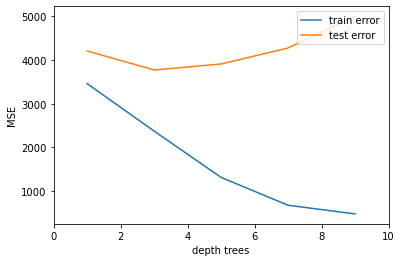

In [30]:
# Для зависимости ошибки от глубины деревьев

n_g=[] #глубина деревьев
z_test1=[] #ошибка на тестовой выборке
z_train1=[] #ошибка на тренировочной выборке

eta = 0.1
n_trees = 20
for i in range(1, 10, 2):
    n_g.append(i)
    trees, train_errors, test_errors = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, eta)
    test_z, train_z=evaluate_alg(X_train, X_test, y_train, y_test, trees, eta)
    z_test1.append(test_z)
    z_train1.append(train_z)
    
    
plt.xlabel('depth trees')
plt.ylabel('MSE')
plt.xlim(0, 10)
plt.plot(n_g, z_train1, label='train error')
plt.plot(n_g, z_test1, label='test error')
plt.legend(loc='upper right')
plt.show()

Вывод: при увеличении глубины деревьев модель начинает переобучаться: ошибка на тренировочной выборке снижается, а на тестовой с определенной глубины начинает расти.